# Astrophysical source population modeling with Gammapy

## Introduction

The [gammapy.astro.population](http://docs.gammapy.org/en/latest/astro/population/index.html) package contains some simple Galactic source population models.

Here we provide some Python code to compute observable parameter distributions for Galactic gamma-ray source populations.

* Observables: Flux, GLON, GLAT
* Source classes: Pulsar (PSR), Supernova remnant (SNR), pulsar wind nebula (PWN)

References:

* Section 6.2 in the Fermi-LAT collaboration paper ["The First Fermi-LAT Catalog of Sources Above 10 GeV"](http://adsabs.harvard.edu/abs/2013arXiv1306.6772T)
* Axel Donath's bachelor thesis ["Modelling Galactic gamma-ray source populations"](http://pubman.mpdl.mpg.de/pubman/item/escidoc:912132:1/component/escidoc:912131/BScThesis_ddonath.pdf), specifically Chapter 4.
* Casanova & Dingus (2008), ["Constraints on the TeV source population and its contribution to the galactic diffuse TeV emission"](http://adsabs.harvard.edu/abs/2008APh....29...63C)
* Strong (2007), ["Source population synthesis and the Galactic diffuse gamma-ray emission"](http://adsabs.harvard.edu/abs/2007Ap%26SS.309...35S)

## Setup

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
from gammapy.utils.random import sample_powerlaw
from gammapy.astro import population

## Simulate positions

In [3]:
# Spatial distribution using Lorimer (2006) model
rho_sun = 3 # source density at the sun (sources kpc^-1)
n_sources = int(1e5) # TODO: I guess this should be computed from rho_sun?
rad_dis = 'L06'
vel_dis = 'F06B'
spiralarms = True
table = population.make_base_catalog_galactic(
    n_sources=n_sources, rad_dis=rad_dis, vel_dis=vel_dis,
    max_age=1e6, spiralarms=spiralarms,
)

In [4]:
# This is done in `make_cat_gal`:
#from gammapy.astro.population import L06
#from gammapy.utils.distributions import draw, GeneralRandom
#galactic_radius = np.linspace(0, 50, 1000)
#density = L06(galactic_radius)
#galactic_angle = np.random.uniform(0, 360, n_sources)
#plt.plot(galactic_radius, density)

## Simulate luminosities

Several source population models, e.g. the 1FHL paper or Strong (2007), use power-law luminosity functions.

Here we implement the "reference model" from the 1FHL catalog paper section 6.2.

In [5]:
luminosity_min  = 1e34 # Minimum source luminosity (ph s^-1)
luminosity_max = 1e37 # Maximum source luminosity (ph s^-1)
luminosity_index = 1.5 # Luminosity function differential power-law index

luminosity = sample_powerlaw(luminosity_min, luminosity_max, luminosity_index, n_sources)
table['luminosity'] = luminosity

## Compute observable parameters

In [6]:
table = population.add_observed_parameters(table)
#table['GLON']
print(','.join(table.colnames))

x_birth,y_birth,z_birth,x,y,z,vx,vy,vz,age,n_ISM,spiralarm,morph_type,v_abs,luminosity,distance,GLON,GLAT,VGLON,VGLAT,RA,DEC,flux


## Check output

The simulation is done, you could save the simulated catalog to a file.

Here we just plot a few distributions to check if the results look OK.

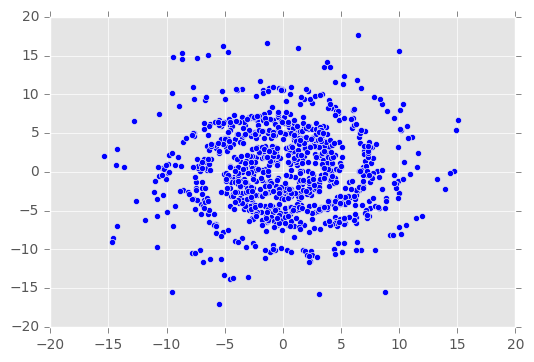

In [7]:
plt.scatter(table['x'][:1000], table['y'][:1000]);

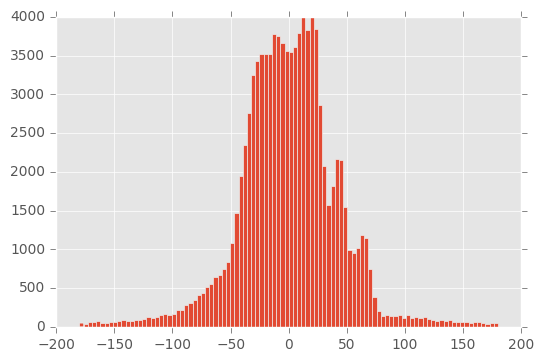

In [8]:
plt.hist(table['GLON'], bins=100);

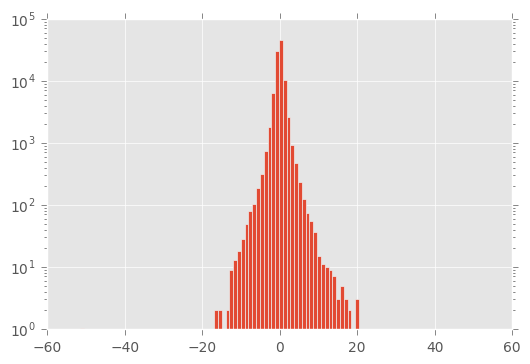

In [9]:
plt.hist(table['GLAT'], bins=100, log=True);

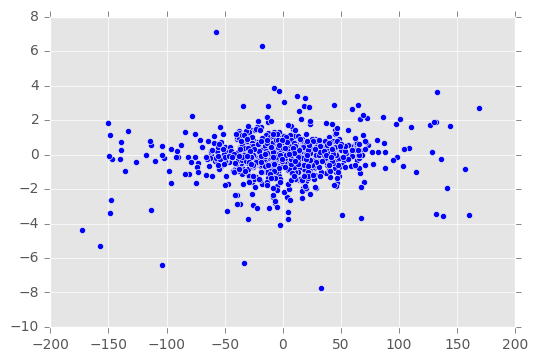

In [10]:
plt.scatter(table['GLON'][:1000], table['GLAT'][:1000]);

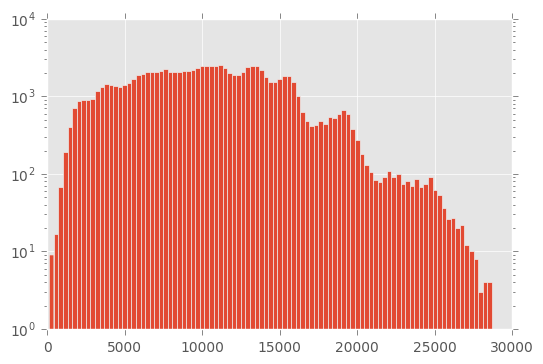

In [11]:
plt.hist(table['distance'], bins=100, log=True);

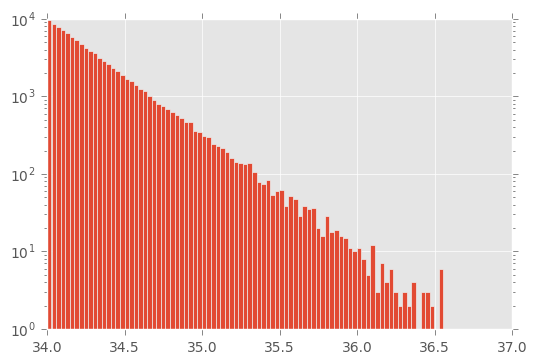

In [12]:
plt.hist(np.log10(table['luminosity']), bins=100, log=True);

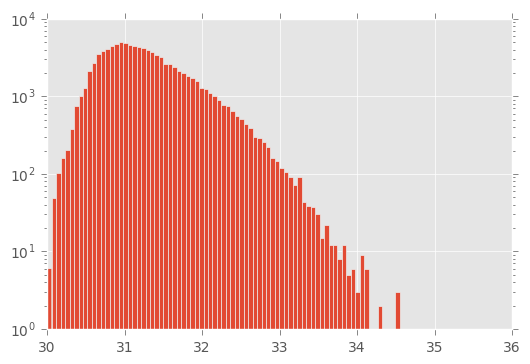

In [13]:
plt.hist(np.log10(table['flux']), bins=100, log=True);

In [14]:
# TODO: plot GLON, GLAT, FLUX distribution


## Exercises

TODO

In [15]:
# Start exercises here

## What next?

TODO: summarise what was done here briefly.

TODO: add some pointers to other documentation.